# Poisson Distribution

In [1]:
# environmental variables, settings and imports
%run '000-env.ipynb'

<IPython.core.display.Javascript object>

---

The **Poisson** probability distribution gives the probability of a number of events occurring in a *fixed interval* of time or space if these events happen *with a known average rate* and *independently* of the time since the last event. 

The Poisson distribution may be used to approximate the binomial if the probability of success is “small” (such as 0.01) and the number of trials is “large” (such as 1,000). 

A Poisson distribution is a discrete distribution. Its shape is similar to the continuous Normal distribution but with some __skewness__. 

* Discrete distribution
* unlike binomial, no limit; bound by 0 and infinity
* Describes the number of events in a fixed interval like time or region of opportunity
* requires a $\lambda$

**assumptions**  
* rate event occurring is constant
* events are independent 

A discrete random variable X has a Poisson distribution with parameter λ if for k=0,1,2..,   
the probability mass function of X is given by:

$$Pr(X=k)=\frac{\lambda^ke^{-\lambda}}{k!}$$

where e is Euler's number (e=2.718...) and k! is the factorial of k.

The Poisson Distribution has the following characteristics:

    1.) Discrete outcomes (x=0,1,2,3...)
    2.) The number of occurrences can range from zero to infinity (theoretically). 
    3.) It describes the distribution of infrequent (rare) events.
    4.) Each event is independent of the other events.
    5.) Describes discrete events over an interval such as a time or distance.
    6.) The expected number of occurrences E(X) are assumed to be constant throughout the experiment.

mean is the $\lambda$ and expected value $E(x)=\lambda=Var(x)$

.

---

## Resources

In [2]:
youGrid("cPOChr_kuQs")

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')),), layout=Layout(grid_template_areas='"w…

---

## Sample Distribution Plot

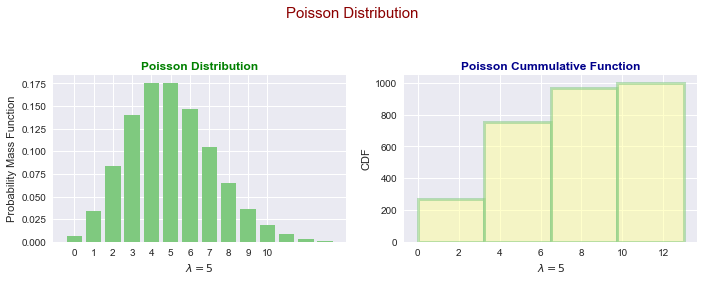

In [2]:
mu = 5

np.random.seed(27)

# random variables for Poisson Distribution
x = stats.poisson(mu=mu).rvs(1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# bar plot for the PMF
ax1.bar(x, stats.poisson(mu=mu).pmf(x), color=COLOR1)
ax1.set_xticks(np.arange(0,11));
ax1.set_ylabel("Probability Mass Function");
ax1.set_xlabel("$\lambda=5$")
ax1.set_title("Poisson Distribution", fontdict={"fontweight":"bold", "color":"green"});


# hist plot for CDF
ax2.hist(x, cumulative=True, alpha=0.5, bins=4, color=COLOR4, edgecolor=COLOR1, linewidth=3)
ax2.set_title("Poisson Cummulative Function", fontdict={"fontweight":"bold", "color":"darkblue"});
ax2.set_xlabel("$\lambda=5$");
ax2.set_ylabel("CDF");

fig.suptitle("Poisson Distribution\n", fontdict={"fontweight":"bold", "color":"darkred"}, fontsize=15);
fig.tight_layout(pad=1.5)

...

## Examples

<span style="font-size:large; color:blue;font-weight:bold">
    A wine company puts ad in Facebook and observe a mean of 12 of click-through sales with a Poisson Distribution
</span>

<i>! this may not be really a Poisson Distribution, where the rate of of events occurring expected to be constant. Let's say, would a customer buy a wine at 6 am?</i>

<span style="font-size:large; color:blue">
(a) Exactly 10 clik-through sales in the first day
</span>

In [3]:
stats.poisson(mu=12).pmf(10)

0.10483725588365922

<span style="font-size:large; color:blue">
(b) At least 10 clik-through sales in the first day
</span>

Survival Function; 1-cdf for covering left-side
$k >= 10$ or $(1 - k<=9)$

In [4]:
stats.poisson(mu=12).sf(9)

0.7576078383294875

<span style="font-size:large; color:blue">
(c) More than one sales in the first hour
</span>

first hour mean ($\lambda$) = 12/24  
more than 1 sales is 1 - left-side (0,1) => sf(1) $=>$ $<1$

In [5]:
stats.poisson(mu=12/24).sf(1)

0.09020401043104986

.

---

<span style="font-size:large; color:blue;font-weight:bold">
McDonald's has a lunch rush  from 12:30pm to 1:00pm. From looking at customer sales from previous days, we know that on average 10 customers enter during 12:30pm to 1:00pm. 
</span>

<span style="font-size:large;color:blue">What is the probability that *exactly* 7 customers enter during lunch rush? What is the probability that *more than* 10 customers arrive? </span>

Let's begin by thinking about how many customers we expect to come into McDonald's during lunch rush. Well we were actually already given that information, it's 10. This means that the mean is 10, then our expected value E(X)=10. In the Poisson distribution this is λ. So the mean = λ for a Poisson Distribution, it is the expected number of occurences over the specfied interval.

<span style="font-size:large; color:blue">
What is the probability that exactly 7 customers enter during lunch rush?
</span>

In [6]:
mu=10
stats.poisson(mu=mu).pmf(7)

0.090079225719216

In [7]:
stats.poisson(mu=mu).interval(0.95)

(4.0, 17.0)

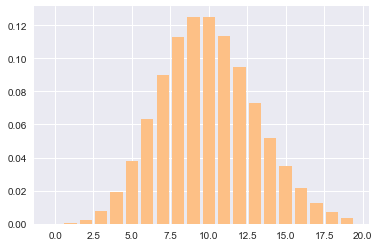

In [8]:
n = np.arange(20)

plt.bar(n, stats.poisson(mu=mu).pmf(n), color=COLOR3);

<span style="font-size:large; color:blue">
What is the probability that more than 10 customers arrive? 
</span>

We need to sum up the value of every bar past 10 the 10 customers bar.

In [15]:
# The probability that 10 or less customers show up
stats.poisson(mu=mu).cdf(10)

0.5830397501929852

In [14]:
# more than 10 customers
stats.poisson(mu=mu).sf(10)

0.41696024980701485

.

<span style="font-size:large; color:blue">Leah’s answering machine receives about six telephone calls between 8 a.m. and 10 a.m. What is the probability that Leah receives more than one call in the next 15 minutes?</span>

In [27]:
# avarage call per 15 min.
mu = (6/120)*15; mu

0.75

In [36]:
# more than one call in 15 min.
stats.poisson(mu=mu).sf(1)

0.17335853270322427